#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

*   
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold, GridSearchCV

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.inspection import permutation_importance

#**Ejercicio-1.** 

En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las mejores en el artículo antes citado: ‘Lifetime People who have liked a Page and engaged with a post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables que indican los autores en la Tabla 3 del artículo citado.

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/AlexeiEACS/Entregas_equipo6_IA_MNA/main/data/Facebook_metrics/dataset_Facebook.csv', sep=';', header=0)
data = data.rename(columns= {'Lifetime People who have liked your Page and engaged with your post':'LPE'})
data = data[["Category", "Page total likes", "Type", "Post Month", "Post Hour", "Post Weekday", "Paid", "LPE"]]
data.head()

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid,LPE
0,2,139441,Photo,12,3,4,0.0,119
1,2,139441,Status,12,10,3,0.0,1108
2,3,139441,Photo,12,3,3,0.0,132
3,2,139441,Photo,12,10,2,1.0,1386
4,2,139441,Photo,12,3,2,0.0,396


#**Ejercicio-2.**

Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y validación.

In [18]:
print(data.shape)
X = data.drop('LPE', axis=1)
y = data['LPE']

(500, 8)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/5) # 20% Conjunto de prueba, y 80% entrenamiento/validación
print(X_test.shape)
print(y_test.shape)

(100, 7)
(100,)


#**Ejercicio-3.**

Definirás tus propias funciones de errores para este problema de regresión. Los errores que utilizarás son la raíz cuadrada del error cuadrático medio RMSE, el error absoluto medio MAE y el error porcentual absoluto medio MAPE.

In [5]:
def mi_RMSE(y_real, y_pred):
    result = np.sqrt(np.mean((y_real - y_pred) ** 2))
    return result

def mi_MAE(y_real, y_pred):
    result = np.mean(np.abs(y_real - y_pred))
    return result

def mi_MAPE(y_real, y_pred):
    result = 100 * np.mean(np.absolute((y_real - y_pred)/y_real))
    return result

In [6]:
def metricas_regresion(y_real, y_pred, name):
    tabla = pd.DataFrame(index = ['RMSE', 'MAE', 'MAPE'],
                        data= [mi_RMSE(y_real, y_pred), mi_MAE(y_real, y_pred), mi_MAPE(y_real, y_pred)], columns= [name])
    return tabla

#**Ejercicio-4.**

En la página de la UCI, así como en el artículo de los autores previamente citado encuentras información en relación al significado de cada variable. Haz una análisis de tus datos y lleva a cabo las transformaciones que consideres adecuadas tanto en los datos de entrada, como en las de salida. Utiliza un Pipeline para evitar el filtrado de información.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          500 non-null    int64  
 1   Page total likes  500 non-null    int64  
 2   Type              500 non-null    object 
 3   Post Month        500 non-null    int64  
 4   Post Hour         500 non-null    int64  
 5   Post Weekday      500 non-null    int64  
 6   Paid              499 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 27.5+ KB
None


array([[<AxesSubplot: title={'center': 'Category'}>,
        <AxesSubplot: title={'center': 'Page total likes'}>],
       [<AxesSubplot: title={'center': 'Post Month'}>,
        <AxesSubplot: title={'center': 'Post Hour'}>],
       [<AxesSubplot: title={'center': 'Post Weekday'}>,
        <AxesSubplot: title={'center': 'Paid'}>]], dtype=object)

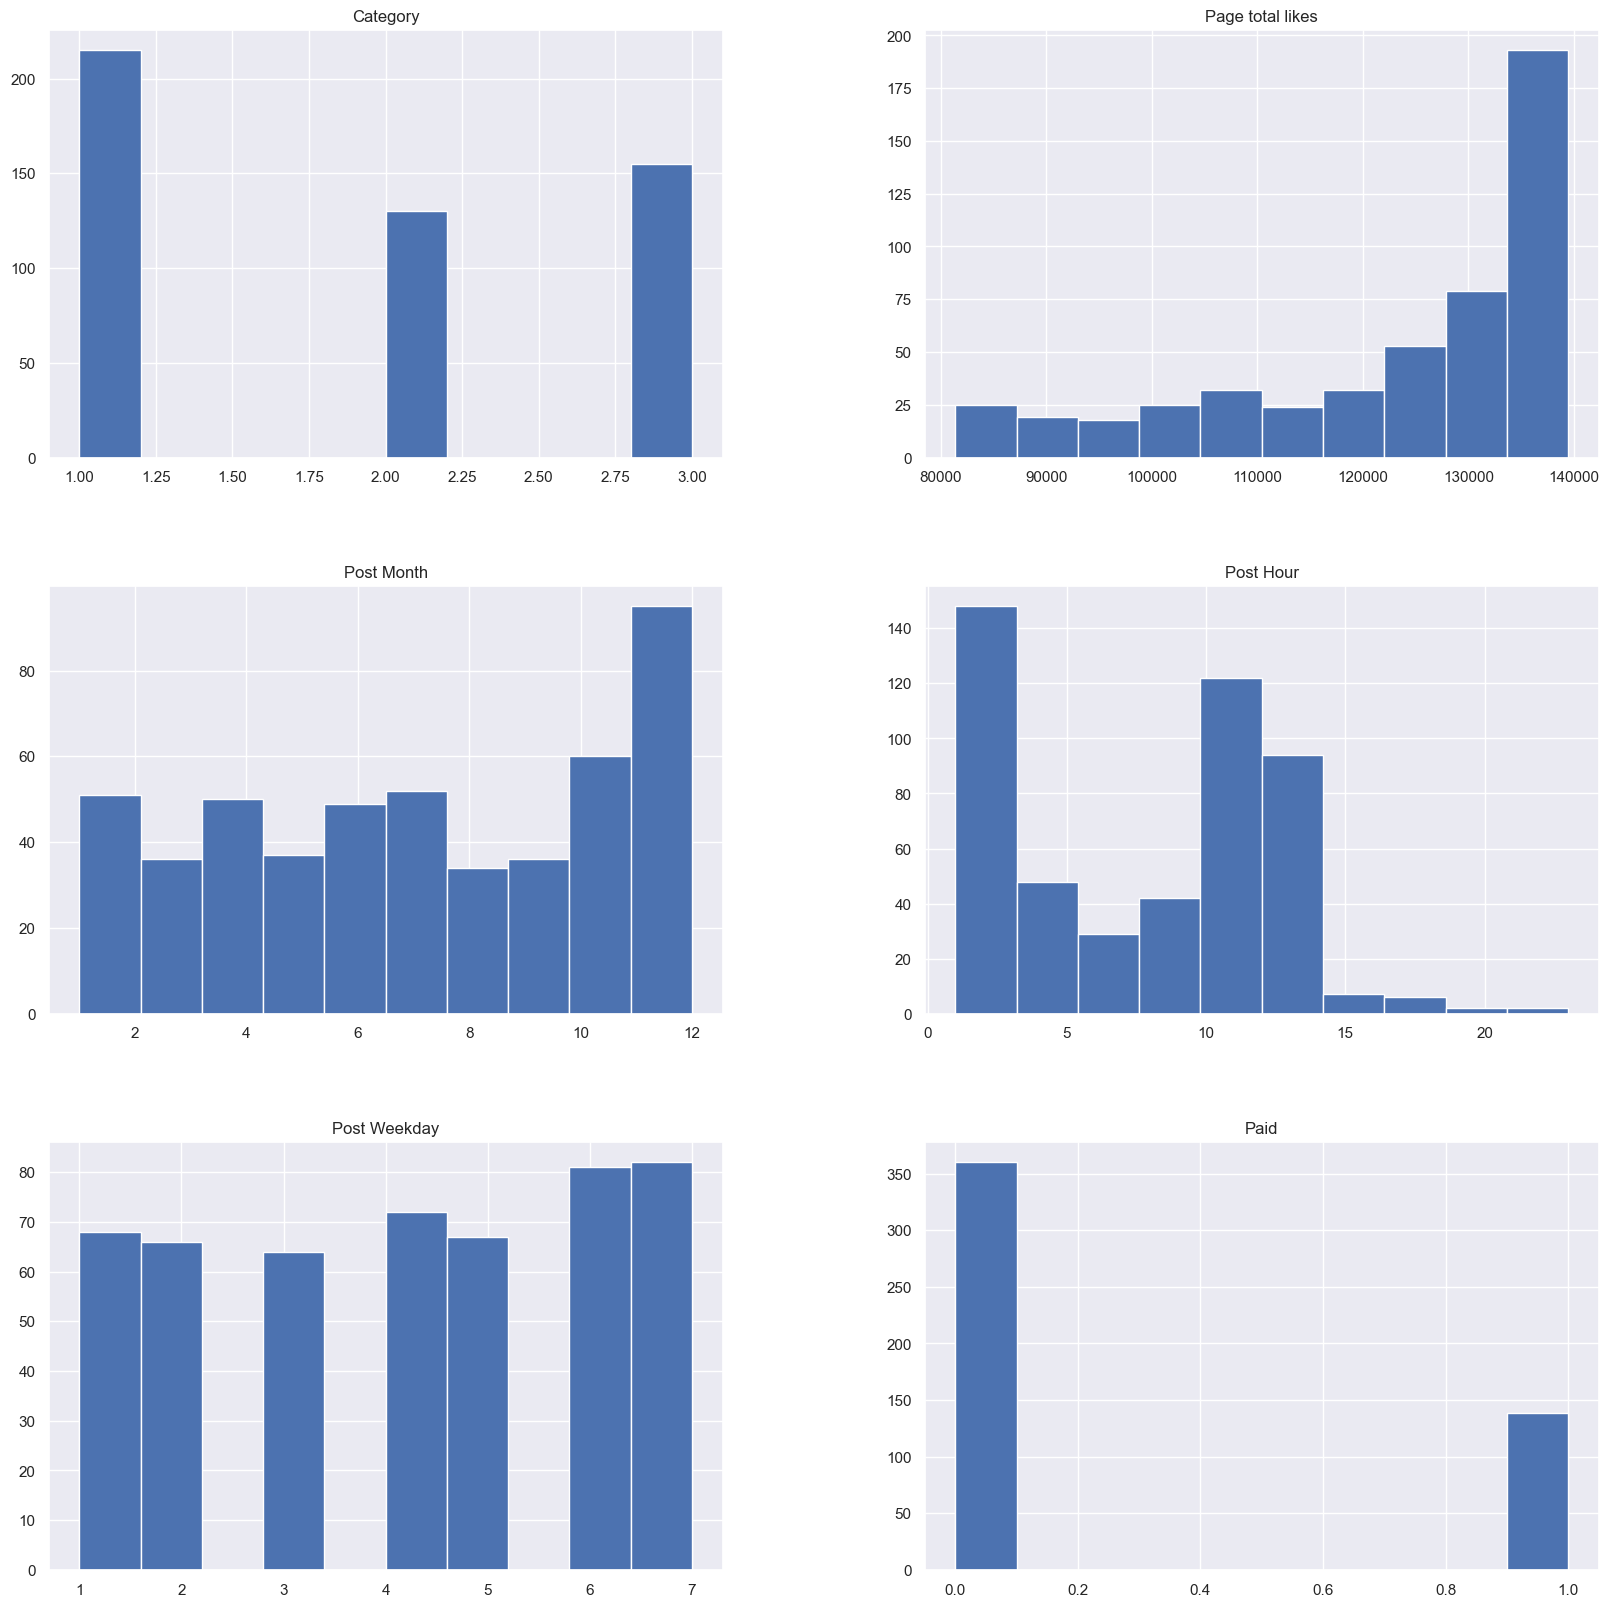

In [7]:
print(X.info())
X.hist(figsize=(20,20))

<AxesSubplot: >

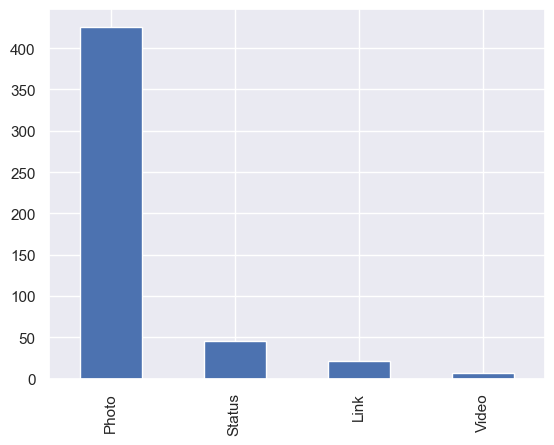

In [8]:
data["Type"].value_counts().plot(kind='bar')

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer

num_pipe = Pipeline(
             steps=[('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler())]
           )
cat_pipe = Pipeline(
             steps= [('Encoder',OneHotEncoder(drop='first')),
                      ('imputer', SimpleImputer(strategy='most_frequent'))]
           )

cat_col = ['Type', 'Category', 'Paid',  'Post Month', 'Post Hour', 'Post Weekday']
num_col = ['Page total likes']
column_transformer = ColumnTransformer(transformers=[
            ('categoricas', cat_pipe, cat_col),
            ('numericas', num_pipe, num_col),
          ])

#**Ejercicio-5.**

Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de datos de entrenamiento y validación. Para ello particiónalos en 100 para validación y 300 para entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y validación. Estos serán tus errores máximos que deberás tomar como referencia en el resto de la actividad. Consulta su documentación correspondiente: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

In [15]:
Xtt, Xtv, ytt, ytv = train_test_split(X_train, y_train, test_size= 100/len(y_train))
print(Xtt.shape)
print(Xtv.shape)

(300, 7)
(100, 7)


In [16]:
dummy_model = DummyRegressor()
dummy_model.fit(Xtt, ytt)

y_pred_tt  = dummy_model.predict(Xtt)
y_pred_tv  = dummy_model.predict(Xtv)
dummy_results = metricas_regresion(ytt, y_pred_tt, 'Entrenamiento').join(metricas_regresion(ytv, y_pred_tv, 'Validación'))
dummy_results



,Entrenamiento,Validación
RMSE,628.757439,446.273812
MAE,407.824756,338.418333
MAPE,114.683538,112.232549


#**Ejercicio-6.**

Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada (RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. Recuerda evitar el filtrado de información usando los datos que obtuviste en el ejercicio 2. Incluye las conclusiones sobre el mejor modelo encontrado en esta primera aproximación. En particular ¿hay alguno sobreentrenado o subentrenado? NOTA: Recuerda que puedes aumentar en dado caso el número máximo de iteraciones para que todos los modelos converjan.

In [14]:
modelos = [LinearRegression(), RandomForestRegressor(), MLPRegressor(max_iter=10000)]
nombres = ['Regresión Lineal', 'Bosque Aleatorio', 'Perceptrón Multicapa']
metricas = {'RMSE':make_scorer(mi_RMSE), 'MAE':make_scorer(mi_MAE), 'MAPE':make_scorer(mi_MAPE)}

print(f'El performance de DUMMY es: ')
print(dummy_results)
print("--------------------------------------------------------")

resultados = []

for model, name in zip(modelos, nombres):
    pipe = make_pipeline(column_transformer, model)
    
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state= 42)
    cv_model = cross_validate(pipe,
        X = X_train,
        y = y_train,
        cv = cv,
        scoring= metricas,
        return_train_score= True,
        error_score= 0,
        n_jobs= -1
    )
    
    resultados.append(cv_model)
    # print(f'Para el modelo de {name} sus valores son:')
    print(pd.DataFrame(index= cv_model.keys(),data= [np.mean(x) for x in cv_model.values()], columns= [name]))


El performance de DUMMY es: 
      Entrenamiento  Validación
RMSE     614.887090  603.505231
MAE      414.289156  370.187600
MAPE     145.971375  141.514744
--------------------------------------------------------
            Regresión Lineal
fit_time            0.012812
score_time          0.005664
test_RMSE         414.860347
train_RMSE        480.932820
test_MAE          249.933196
train_MAE         293.203210
test_MAPE          78.720546
train_MAPE         95.127678
            Bosque Aleatorio
fit_time            0.189566
score_time          0.015449
test_RMSE         458.408164
train_RMSE        212.150271
test_MAE          280.604884
train_MAE         129.936593
test_MAPE          87.280962
train_MAPE         40.387789
            Perceptrón Multicapa
fit_time               12.427118
score_time              0.006552
test_RMSE             427.252131
train_RMSE            433.861226
test_MAE              261.318506
train_MAE             269.729653
test_MAPE              80.693316



Conculsiones sobre el ejercicio 6

Se puede ver


#**Ejercicio-7.**

Obtener los diagramas de caja y bigote para los errores MAPE de los conjuntos de validación obtenidos. En particular compara estos primeros resultados de MAPE con el mejor resultado que encuentran los autores del artículo citado al inicio. Incluye tus conclusiones.

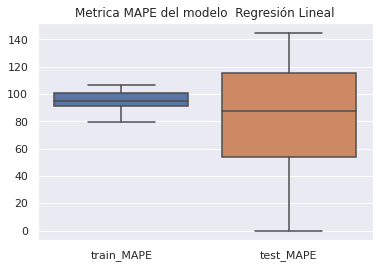

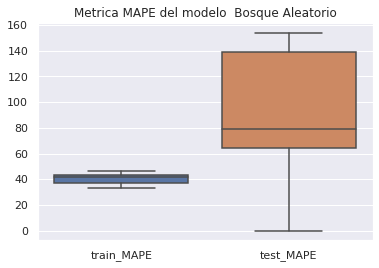

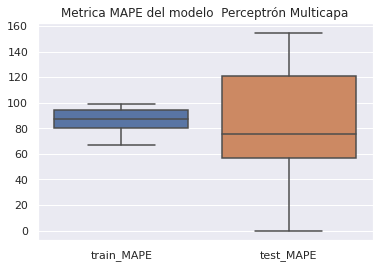

In [15]:
train_list = [f'train_{x}' for x in metricas.keys()]
test_list = [f'test_{x}' for x in metricas.keys()]
pd.DataFrame(resultados[0])

for i in range(len(resultados)):
  res_temp = pd.DataFrame(resultados[i])
  sns.boxplot(data=res_temp[["train_MAPE", "test_MAPE"]])

  plt.title(f'Metrica MAPE del modelo  {nombres[i]}')
  
  plt.show()


Conculsiones sobre el ejercicio 7

Viendo las gráficas del MAPE se puede ver que el mejor modelo fue la regresión lineal ya que se mantuvo cercana a su media de entrenamiento la media de validación. El modelo que sub ajusto fue el bosque aleatorio pero ese era de esperarse ya que no se ajustaron sus hipérparametros, el que sobre ajustó fue el Perceotrón ya que tuvo mucho mejor resultado de entrenamiento y en la validación tuvo valores con demasiada variación. Aquí se puede ver el trade de sesgo y variación.


#**Ejercicio-8.**

Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”. Además aplica la validación cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados.


In [22]:
pipe_MLP = Pipeline(steps=[('columns', column_transformer),
                            ('modelo', MLPRegressor(max_iter=10000, n_jobs = -1))])

parms_MLP = {'modelo__hidden_layer_sizes': [(k,) for k in np.arange(1, 200, 50, dtype=int)],
            'modelo__alpha': np.linspace(0.0001,0.1,4),
            'modelo__learning_rate_init': np.linspace(0.001,0.1,10),
            'modelo__learning_rate': ['invsacaling', 'adaptive'],
            'modelo__activation': ['identity', 'logistic', 'tanh', 'relu'],
            'modelo__solver': ['adam', 'sgd']
            }

mi_kfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

mlp_grid = GridSearchCV(estimator= pipe_MLP, 
                      param_grid= parms_MLP,
                      scoring= make_scorer(mi_MAPE),
                      cv= mi_kfold,
                      n_jobs= -1)

mlp_grid.fit(X_train, y_train)
print(f'El mejor score fue: {mlp_grid.best_score_}')
print(f'Los mejores parametros fueron: {mlp_grid.best_params_}')
mpl_mejor_modelo = image.png_grid.best_estimator_

#**Ejercicio-9.**

Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de los factores. Muestra un diagrama de barras de los resultados e incluye tus conclusiones.

In [ ]:
# mlp_pred = mpl_mejor_modelo.predict(X_test)
# mlp_pred.hist(figsize=(5,5))

importancia = permutation_importance(mpl_mejor_modelo, X_train, y_train, n_repeats=10)
importancia_df = pd.DataFrame(importancia['importances_mean'], columns = X_train.colums)
importancia_df

Análisis de mejores Hiperparámetros para MLP

Se puede ver

#**Ejercicio-10.**

In [ ]:
pipe_rf = Pipeline(steps=[('columns', column_transformer),
                            ('modelo', RandomForestRegressor(n_jobs= -1))])

parms_rf = {'modelo__n_estimators': np.arange(10,100,10),
            'modelo__criterion': ['squared_error', 'absolute_error', 'poisson'],
            'modelo__max_depth': np.arange(10, 100, 10)
            }

mi_kfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

rf_grid = GridSearchCV(estimator= pipe_rf, 
                      param_grid= parms_rf,
                      scoring= make_scorer(mi_MAPE),
                      cv= mi_kfold,
                      n_jobs= -1)

rf_grid.fit(X_train, y_train)
print(f'El mejor score fue: {rf_grid.best_score_}')
print(f'Los mejores parametros fueron: {rf_grid.best_params_}')
rf_mejor_modelo = rf_grid.best_estimator_

In [ ]:
importancia = permutation_importance(rf_mejor_modelo, X_train, y_train, n_repeats=10)
importancia_df = pd.DataFrame(importancia['importances_mean'], columns = X_train.colums)
importancia_df

#**Ejercicio-11.**

In [ ]:
pipe_lr = Pipeline(steps=[('columns', column_transformer),
                            ('modelo', LinearRegression())])

parms_lr = {'modelo__normalize': [True, False]}

mi_kfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

lr_grid = GridSearchCV(estimator= pipe_lr, 
                      param_grid= parms_lr,
                      scoring= make_scorer(mi_MAPE),
                      cv= mi_kfold,
                      n_jobs= -1)

lr_grid.fit(X_train, y_train)
print(f'El mejor score fue: {lr_grid.best_score_}')
print(f'Los mejores parametros fueron: {lr_grid.best_params_}')
lr_mejor_modelo = lr_grid.best_estimator_

In [ ]:
importancia = permutation_importance(lr_mejor_modelo, X_train, y_train, n_repeats=10)
importancia_df = pd.DataFrame(importancia['importances_mean'], columns = X_train.colums)
importancia_df

#**Ejercicio-12.**

In [ ]:
None

###**Fin de la Actividad de la semana 7.**